<a href="https://colab.research.google.com/github/ajith18thayil/My-WorkS/blob/main/maskdata_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
from skimage.transform import resize
from skimage.io import imread

In [ ]:
flat_data=[]
target_arr=[]
categories=['with_mask', 'without_mask']
datapath='/content/drive/MyDrive/datamask'
for i in categories:
  path=os.path.join(datapath,i)
  for img in os.listdir(path):
    image_arr=imread(os.path.join(path,img))
    image_resized=resize(image_arr,(150,150,3))
    flat_data.append([image_resized.flatten()])
    target_arr.append(categories.index(i))
  print('loaded',i)

loaded with_mask
loaded without_mask


In [ ]:
flat_data

[[array([0.7058142 , 0.51891782, 0.44168906, ..., 0.46092061, 0.29606065,
         0.23302519])],
 [array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
         0.99607843])],
 [array([0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
         0.99215686])],
 [array([1., 1., 1., ..., 1., 1., 1.])],
 [array([0.72156863, 0.76862745, 0.78039216, ..., 0.40246732, 0.39897712,
         0.4223268 ])],
 [array([0.89411765, 0.8745098 , 0.85098039, ..., 0.86764706, 0.83921569,
         0.80784314])],
 [array([1., 1., 1., ..., 1., 1., 1.])],
 [array([0.1971573 , 0.13988427, 0.11165804, ..., 0.10468078, 0.01307294,
         0.0043932 ])],
 [array([0.7587451 , 0.76196706, 0.77935948, ..., 0.7439681 , 0.72043869,
         0.73612497])],
 [array([0.98823529, 0.98823529, 0.99607843, ..., 0.80960784, 0.59172549,
         0.50239216])],
 [array([0.65304575, 0.65696732, 0.67657516, ..., 0.89454902, 0.72984314,
         0.63572549])],
 [array([0.96078431, 0.96470588, 0.9

In [ ]:
df=pd.DataFrame(flat_data)
df

,0
0,"[0.7058142047930291, 0.5189178213507635, 0.441..."
1,"[0.996078431372549, 0.996078431372549, 0.99607..."
2,"[0.9921568627450981, 0.9921568627450981, 0.992..."
3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,"[0.7215686274509804, 0.7686274509803921, 0.780..."
...,...
6284,"[0.5764705882352941, 0.6784313725490196, 0.525..."
6285,"[0.9760251851851861, 0.966078431372551, 0.9208..."
6286,"[0.07035607843137244, 0.05051607843137232, 0.0..."
6287,"[0.8600196078431326, 0.8601699346405178, 0.838..."


In [ ]:
df['target']=target_arr

In [ ]:
x=df[0].to_list()
y=df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       510
           1       0.92      0.94      0.93       748

    accuracy                           0.91      1258
   macro avg       0.91      0.91      0.91      1258
weighted avg       0.91      0.91      0.91      1258

Accuracy Score: 0.9125596184419714


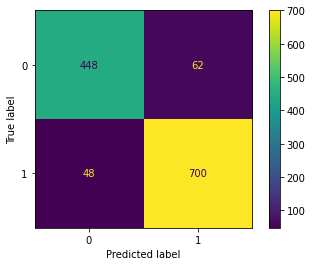

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
print(classification_report(y_test,y_pred))
result=confusion_matrix(y_test,y_pred)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()
print('Accuracy Score:',accuracy_score(y_test,y_pred))

In [ ]:
photopath='/content/drive/MyDrive/aishwarya-rai-bachchan_155236384910.jpeg'
image=imread(photopath)
imageresized=resize(image,(150,150,3)).flatten().reshape(1,-1)
model.predict(imageresized)

array([1])

In [ ]:
image2=imread('/content/drive/MyDrive/OIP.jpeg')
imageresized2=resize(image2,(150,150,3)).flatten().reshape(1,-1)
model.predict(imageresized2)

array([0])